In [116]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [119]:
titanic_data = pd.read_csv("train.csv")

In [120]:
type(titanic_data)

pandas.core.frame.DataFrame

In [121]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [122]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [99]:
titanic_data.isnull().values.any()

True

In [100]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [101]:
titanic_data = titanic_data.drop(["Name", "Ticket", "Fare"], axis = 1)

In [104]:
titanic_data = titanic_data.dropna()

In [105]:
titanic_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
1,2,1,1,female,38.0,1,0,C85,C
3,4,1,1,female,35.0,1,0,C123,S
6,7,0,1,male,54.0,0,0,E46,S
10,11,1,3,female,4.0,1,1,G6,S
11,12,1,1,female,58.0,0,0,C103,S
...,...,...,...,...,...,...,...,...,...
871,872,1,1,female,47.0,1,1,D35,S
872,873,0,1,male,33.0,0,0,B51 B53 B55,S
879,880,1,1,female,56.0,0,1,C50,C
887,888,1,1,female,19.0,0,0,B42,S


In [106]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [107]:
y = titanic_data["Survived"]

In [108]:
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [109]:
X = titanic_data.drop(["Survived"], axis = 1)

In [110]:
X.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin',
       'Embarked'],
      dtype='object')

In [111]:
y = pd.DataFrame(y)

In [112]:
y.columns

Index(['Survived'], dtype='object')

In [113]:
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'sex'.
X['Sex']= label_encoder.fit_transform(X['Sex'])
X["Cabin"] = label_encoder.fit_transform(X["Cabin"])
X["Embarked"] = label_encoder.fit_transform(X["Embarked"])

In [118]:
X["Cabin"].unique()

array([ 72,  48, 117, 131,  43,  99,  10,  55,  90,  18,  71, 129, 127,
       110,   9,  81,  87,  45,  31, 104,  95,  39, 128,  53,  14,  11,
        60, 130,  23,  37,   6,  92,  83,  78,  69,  91,  74,  35, 122,
        40,  50,  79,  47, 101,  26,  80,  54,  65, 113,  63,  30,  67,
       112,  57,  13,  49,  76, 115, 132, 111,  93,  19, 119,  70,  41,
       103,  62, 116,   7,  44,  46,  77, 114, 105, 121,  20,  56,  86,
        36, 109,  94,  34,  21,  22,  16,  73,  68,   1,  42,  66,   0,
       123,  24,   2,  85,  98, 102,   3,  28,   5,  96, 120,  33,  29,
        97,  27,  15, 126,  64, 108,  75,  51,  58, 125,  12,  59,  89,
       106,  82, 124,  17, 100,  38,  84,   8,  32, 118,  88, 107,   4,
        61,  25,  52])

In [115]:
neigh.fit(X, y)

C:\Users\ALLY SAHA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [117]:
plt.bar(X["Sex"])

TypeError: bar() missing 1 required positional argument: 'height'

In [181]:
titanic_data =  titanic_data.dropna()

In [124]:
dict = {}

In [125]:
dict["male"] = 0

In [126]:
dict

{'male': 0}

In [127]:
dict["female"] = 0

In [128]:
dict

{'male': 0, 'female': 0}

In [130]:
titanic_data_values = titanic_data.values

In [135]:
titanic_data_values[0][4]

'male'

In [136]:
for row in titanic_data_values:
    dict[row[4]] = dict[row[4]] + 1

In [138]:
dict

{'male': 577, 'female': 314}

In [139]:
gender = list(dict.keys())

In [140]:
gender

['male', 'female']

In [141]:
values = list(dict.values())

In [143]:
values

[577, 314]

<BarContainer object of 2 artists>

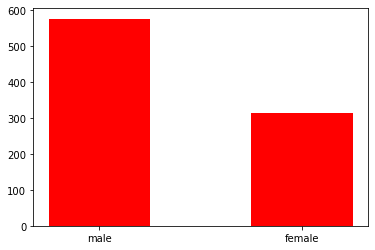

In [144]:
plt.bar(gender, values, color="red", width = 0.5)

In [148]:
titanic_data_cabin = titanic_data["Cabin"]

In [149]:
titanic_data_cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [150]:
titanic_data_cabin = pd.DataFrame(titanic_data_cabin)

In [151]:
titanic_data_cabin

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN
...,...
886,NaN
887,B42
888,NaN
889,C148


In [156]:
titanic_data_cabin = titanic_data_cabin.dropna()

In [169]:
d = {}

In [170]:
values = titanic_data_cabin.values

In [171]:
len(values)

204

In [176]:
for row in values:
    print(row)

['C85']
['C123']
['E46']
['G6']
['C103']
['D56']
['A6']
['C23 C25 C27']
['B78']
['D33']
['B30']
['C52']
['B28']
['C83']
['F33']
['F G73']
['C23 C25 C27']
['E31']
['A5']
['D10 D12']
['D26']
['C110']
['B58 B60']
['E101']
['D26']
['F E69']
['D47']
['C123']
['B86']
['F2']
['C2']
['E33']
['B19']
['A7']
['C49']
['F4']
['A32']
['F2']
['B4']
['B80']
['G6']
['A31']
['D36']
['D15']
['C93']
['C83']
['C78']
['D35']
['G6']
['C87']
['B77']
['E67']
['B94']
['C125']
['C99']
['C118']
['D7']
['A19']
['B49']
['D']
['C22 C26']
['C106']
['B58 B60']
['E101']
['C22 C26']
['C65']
['E36']
['C54']
['B57 B59 B63 B66']
['C7']
['E34']
['C32']
['D']
['B18']
['C124']
['C91']
['C2']
['E40']
['T']
['F2']
['C23 C25 C27']
['F33']
['C128']
['E33']
['D37']
['B35']
['E50']
['C82']
['B96 B98']
['D36']
['G6']
['C78']
['E10']
['C52']
['E44']
['B96 B98']
['C23 C25 C27']
['A34']
['C104']
['C111']
['C92']
['E38']
['D21']
['E12']
['E63']
['D']
['A14']
['B49']
['C93']
['B37']
['C30']
['D20']
['C22 C26']
['B79']
['C65']
['E25']
['D

In [177]:
d = {}
for row in values:
    current_cabin = row[0]
    if current_cabin in d:
        d[current_cabin] = d[current_cabin] + 1
    else:
        d[current_cabin] = 1
    

In [178]:
d

{'C85': 1,
 'C123': 2,
 'E46': 1,
 'G6': 4,
 'C103': 1,
 'D56': 1,
 'A6': 1,
 'C23 C25 C27': 4,
 'B78': 1,
 'D33': 2,
 'B30': 1,
 'C52': 2,
 'B28': 2,
 'C83': 2,
 'F33': 3,
 'F G73': 2,
 'E31': 1,
 'A5': 1,
 'D10 D12': 1,
 'D26': 2,
 'C110': 1,
 'B58 B60': 2,
 'E101': 3,
 'F E69': 1,
 'D47': 1,
 'B86': 1,
 'F2': 3,
 'C2': 2,
 'E33': 2,
 'B19': 1,
 'A7': 1,
 'C49': 1,
 'F4': 2,
 'A32': 1,
 'B4': 1,
 'B80': 1,
 'A31': 1,
 'D36': 2,
 'D15': 1,
 'C93': 2,
 'C78': 2,
 'D35': 2,
 'C87': 1,
 'B77': 2,
 'E67': 2,
 'B94': 1,
 'C125': 2,
 'C99': 1,
 'C118': 1,
 'D7': 1,
 'A19': 1,
 'B49': 2,
 'D': 3,
 'C22 C26': 3,
 'C106': 1,
 'C65': 2,
 'E36': 1,
 'C54': 1,
 'B57 B59 B63 B66': 2,
 'C7': 1,
 'E34': 1,
 'C32': 1,
 'B18': 2,
 'C124': 2,
 'C91': 1,
 'E40': 1,
 'T': 1,
 'C128': 1,
 'D37': 1,
 'B35': 2,
 'E50': 1,
 'C82': 1,
 'B96 B98': 4,
 'E10': 1,
 'E44': 2,
 'A34': 1,
 'C104': 1,
 'C111': 1,
 'C92': 2,
 'E38': 1,
 'D21': 1,
 'E12': 1,
 'E63': 1,
 'A14': 1,
 'B37': 1,
 'C30': 1,
 'D20': 2,
 'B79'

<BarContainer object of 147 artists>

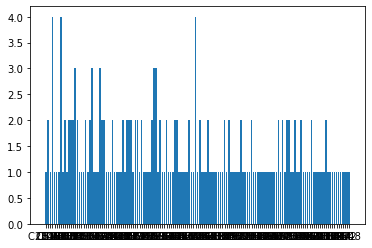

In [179]:
plt.bar(d.keys(), d.values())

In [182]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [183]:
x = list(titanic_data["PassengerId"])

In [184]:
x

[2,
 4,
 7,
 11,
 12,
 22,
 24,
 28,
 53,
 55,
 63,
 67,
 76,
 89,
 93,
 97,
 98,
 103,
 111,
 119,
 124,
 125,
 137,
 138,
 140,
 149,
 152,
 171,
 175,
 178,
 184,
 194,
 195,
 196,
 206,
 210,
 216,
 219,
 225,
 231,
 246,
 249,
 252,
 253,
 258,
 263,
 264,
 269,
 270,
 274,
 276,
 292,
 293,
 298,
 300,
 306,
 308,
 310,
 311,
 312,
 319,
 320,
 326,
 328,
 330,
 332,
 333,
 337,
 338,
 340,
 341,
 342,
 346,
 357,
 367,
 370,
 371,
 378,
 391,
 394,
 395,
 413,
 430,
 431,
 435,
 436,
 439,
 446,
 450,
 453,
 454,
 457,
 461,
 463,
 474,
 485,
 487,
 488,
 493,
 497,
 499,
 505,
 506,
 513,
 516,
 517,
 521,
 524,
 537,
 540,
 541,
 545,
 551,
 557,
 559,
 572,
 573,
 578,
 582,
 584,
 586,
 588,
 592,
 600,
 610,
 619,
 622,
 626,
 628,
 631,
 633,
 642,
 646,
 648,
 660,
 663,
 672,
 680,
 682,
 690,
 691,
 699,
 700,
 701,
 702,
 708,
 711,
 713,
 716,
 717,
 718,
 725,
 731,
 738,
 742,
 743,
 746,
 749,
 752,
 760,
 764,
 766,
 773,
 780,
 782,
 783,
 790,
 797,
 803,
 807,


In [185]:
y = list(titanic_data["Fare"])

In [186]:
y

[71.2833,
 53.1,
 51.8625,
 16.7,
 26.55,
 13.0,
 35.5,
 263.0,
 76.7292,
 61.9792,
 83.475,
 10.5,
 7.65,
 263.0,
 61.175,
 34.6542,
 63.3583,
 77.2875,
 52.0,
 247.5208,
 13.0,
 77.2875,
 26.2833,
 53.1,
 79.2,
 26.0,
 66.6,
 33.5,
 30.6958,
 28.7125,
 39.0,
 26.0,
 27.7208,
 146.5208,
 10.4625,
 31.0,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 52.5542,
 10.4625,
 26.55,
 86.5,
 79.65,
 0.0,
 153.4625,
 135.6333,
 29.7,
 77.9583,
 91.0792,
 12.875,
 151.55,
 247.5208,
 151.55,
 108.9,
 56.9292,
 83.1583,
 262.375,
 164.8667,
 134.5,
 135.6333,
 13.0,
 57.9792,
 28.5,
 153.4625,
 66.6,
 134.5,
 35.5,
 26.0,
 263.0,
 13.0,
 55.0,
 75.25,
 69.3,
 55.4417,
 211.5,
 120.0,
 113.275,
 16.7,
 90.0,
 8.05,
 26.55,
 55.9,
 120.0,
 263.0,
 81.8583,
 30.5,
 27.75,
 89.1042,
 26.55,
 26.55,
 38.5,
 13.7917,
 91.0792,
 90.0,
 29.7,
 30.5,
 78.2667,
 151.55,
 86.5,
 108.9,
 26.2875,
 34.0208,
 10.5,
 93.5,
 57.9792,
 26.55,
 49.5,
 71.0,
 106.425,
 110.8833,
 39.6,
 79.65,
 51.4792,
 26.3875,
 55

Text(0, 0.5, 'Fare')

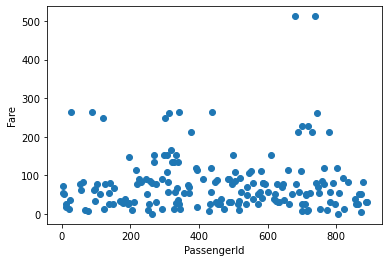

In [192]:
plt.scatter(x,y)
plt.xlabel("PassengerId")
plt.ylabel("Fare")